In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import six
from IPython import display
from scipy import misc
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
from skimage import data
from io import StringIO
import imageio

## Carregando a Imagem e verificando as dimensões do array

In [2]:
# Image to color quantization;
Bird = imageio.imread('img2.jpg')

#load the image as an numpy array
image = misc.imread('img2.jpg')
print(image)
print(image.shape)

[[[175 131 118]
  [175 131 118]
  [174 130 117]
  ...
  [201 180 177]
  [200 179 176]
  [199 178 175]]

 [[175 131 118]
  [175 131 118]
  [174 130 117]
  ...
  [200 179 176]
  [199 178 175]
  [199 178 175]]

 [[174 130 117]
  [174 130 117]
  [174 130 117]
  ...
  [199 178 175]
  [198 177 174]
  [198 177 174]]

 ...

 [[191 187 100]
  [201 196 114]
  [215 211 137]
  ...
  [166 185 192]
  [166 185 192]
  [166 185 192]]

 [[191 193 110]
  [203 206 127]
  [219 220 150]
  ...
  [165 184 191]
  [165 184 191]
  [165 184 191]]

 [[195 203 120]
  [208 215 138]
  [223 228 161]
  ...
  [164 183 190]
  [164 183 190]
  [164 183 190]]]
(400, 500, 3)


C:\Users\mferrero\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


## Exibindo a Imagem original

In [3]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(Bird.shape)

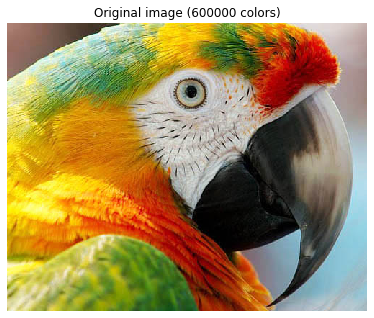

In [4]:
#Display the original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

In [5]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Widht:",w)
print("Height:",h)
print("Channels/Dimension:",d)
print("Each channel for RGB and Range is [0 -255]")
print("If each channel required 1 byte of space which means 3 bytes for each pixel")
print("\nThen for whole image it will require {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("Which comes around {} Mb".format((w*h*d)/(10000000)))

Widht: 400
Height: 500
Channels/Dimension: 3
Each channel for RGB and Range is [0 -255]
If each channel required 1 byte of space which means 3 bytes for each pixel

Then for whole image it will require 400 x 500 x 3 = 600000 bytes
Which comes around 0.06 Mb


In [6]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

## Treinamento e Predição do Clusters k-Means para 2 cores

In [7]:
n_colors = 2

# Image you want to do color quantization;
Bird = imageio.imread('img2.jpg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
Bird = np.array(Bird, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(Bird.shape)

#The code forward runs for 3 channel only
assert d == 3 

image_array = np.reshape(Bird, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

#Get labels for all points
labels = kmeans.predict(image_array)

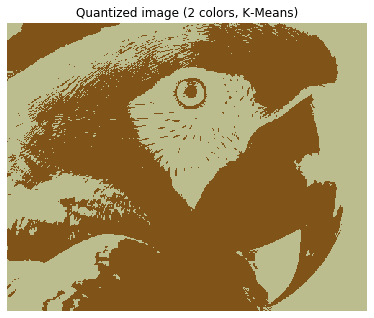

In [8]:
#Displaying Image using k-means with 2 colors
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (2 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

## Treinamento e Predição do Clusters k-Means para 2 cores

In [9]:
n_colors = 4

# Image you want to do color quantization;
Bird = imageio.imread('img2.jpg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
Bird = np.array(Bird, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(Bird.shape)

#The code forward runs for 3 channel only
assert d == 3 

image_array = np.reshape(Bird, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

#Get labels for all points
labels = kmeans.predict(image_array)

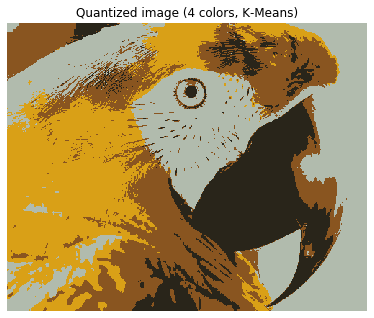

In [10]:
#Displaying Image using k-means with 4 colors
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (4 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

## Treinamento e Predição do Clusters k-Means para 8 cores

In [11]:
n_colors = 8

# Image you want to do color quantization;
Bird = imageio.imread('img2.jpg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
Bird = np.array(Bird, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(Bird.shape)

#The code forward runs for 3 channel only
assert d == 3 

image_array = np.reshape(Bird, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

#Get labels for all points
labels = kmeans.predict(image_array)

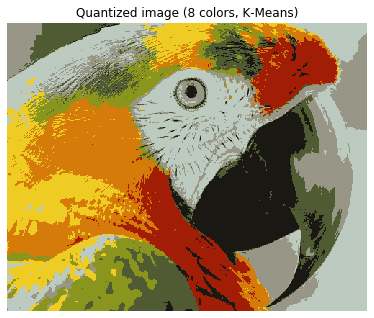

In [12]:
#Displaying Image using k-means with 8 colors
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (8 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

## Treinamento e Predição do Clusters k-Means para 16 cores

In [13]:
n_colors = 16

# Image you want to do color quantization;
Bird = imageio.imread('img2.jpg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
Bird = np.array(Bird, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(Bird.shape)

#The code forward runs for 3 channel only
assert d == 3 

image_array = np.reshape(Bird, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

#Get labels for all points
labels = kmeans.predict(image_array)

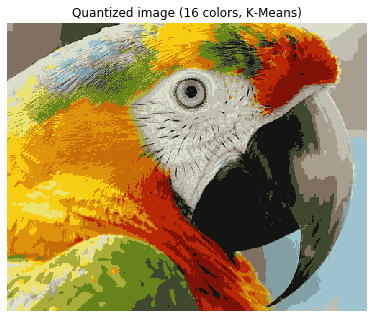

In [14]:
#Displaying Image using k-means with 16 colors
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (16 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))